In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('retail_sales_dataset.csv')
pd.DataFrame(df)
print(df.head())


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


this data got no mistake only fixing date  section no null column  diff values  not need to cleen data 

In [2]:
# print(df.isnull())
# print(df.drop_duplicates())
print(df.shape)
print(df.columns)
print(df.info())


(1000, 9)
Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


for now data have no duplicates and null columns and row and we got int64 and object as dtype

Questions to Explore:

#How does customer age and gender influence their purchasing behavior?

#Are there discernible patterns in sales across different time periods?

#Which product categories hold the highest appeal among customers?

#What are the relationships between age, spending, and product preferences?

#What insights can be gleaned from the distribution of product prices within each category?

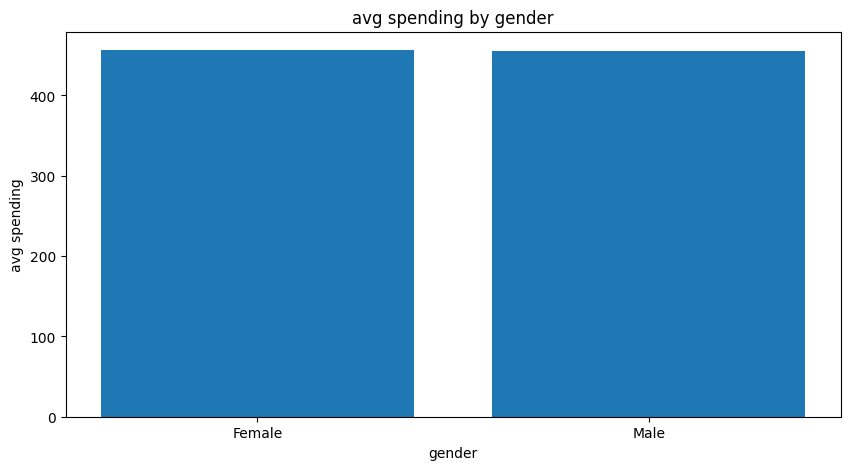

Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


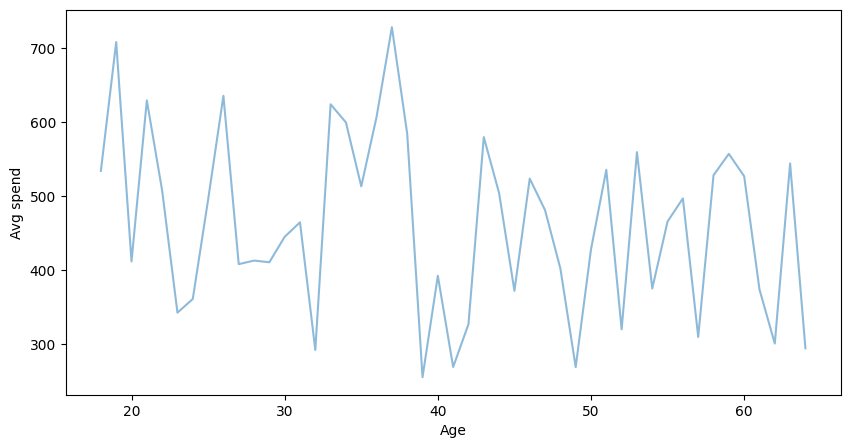

Age
18    534.047619
19    708.095238
20    411.666667
21    629.250000
22    507.407407
23    342.500000
24    361.000000
25    495.000000
26    635.454545
27    408.043478
28    412.857143
29    410.625000
30    445.000000
31    464.545455
32    292.105263
33    624.000000
34    599.464286
35    513.181818
36    607.000000
37    728.125000
38    584.210526
39    255.277778
40    392.291667
41    269.047619
42    326.923077
43    579.677419
44    504.000000
45    372.058824
46    523.600000
47    480.961538
48    402.222222
49    268.947368
50    428.043478
51    535.500000
52    320.000000
53    559.411765
54    375.178571
55    465.714286
56    496.842105
57    309.666667
58    528.214286
59    557.058824
60    526.818182
61    373.888889
62    300.740741
63    544.117647
64    294.354839
Name: Total Amount, dtype: float64


In [11]:
## for find purchasing behavior
# Average sales by gender
grouped = df.groupby("Gender")["Total Amount"].mean()
plt.figure(figsize=(10,5))
plt.bar(grouped.index, grouped.values)
plt.title("avg spending by gender")
plt.xlabel("gender")
plt.ylabel("avg spending")
plt.show()
print(grouped)

#with age
grouped_age=df.groupby("Age")["Total Amount"].mean()
plt.figure(figsize=(10,5))
plt.plot(grouped_age.index,grouped_age.values,alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Avg spend")
plt.show()
print(grouped_age)


so as you see female have got more purchasing power and talk about age so between 30 to 40 high purchasing power 

C:\Users\soura\AppData\Local\Temp\ipykernel_12088\3894854091.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)


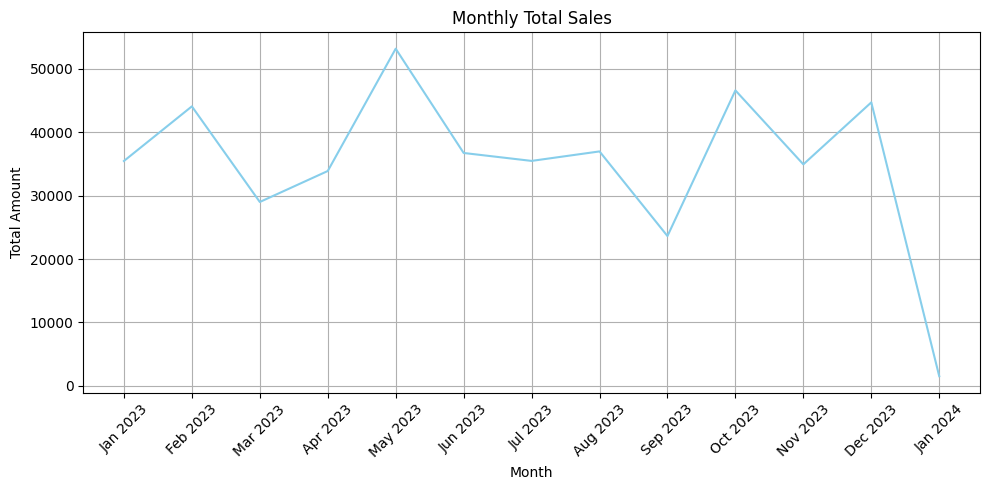

In [4]:


#  Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

#  Extract 'Month_Year' as real datetime — month starts (e.g., 2024-01-01)
df["Month_Year"] = df["Date"].dt.to_period("M").dt.to_timestamp()

#  Group by the new datetime month-year
grouped_time = df.groupby("Month_Year")["Total Amount"].sum().sort_index()

# Plot with formatted labels for x-axis
plt.figure(figsize=(10, 5))
plt.plot(grouped_time.index.strftime("%b %Y"), grouped_time.values, color='skyblue')

plt.title("Monthly Total Sales")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='both')
plt.show()


between apr to jun spending is too high other time is spending is normal in agu to sep we saw a low spending then at last des to jan we saw a big drop,for more understending we can go more deep like with catogory have more spending and gender too and do somthing with age too 

Product Category
Beauty         467.475570
Clothing       443.247863
Electronics    458.786550
Name: Total Amount, dtype: float64


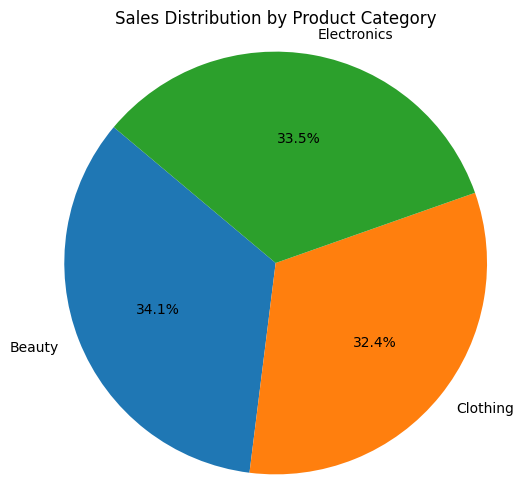

In [5]:
grouped_category = df.groupby("Product Category")["Total Amount"].mean()
print(grouped_category)


plt.figure(figsize=(6,6)) 
plt.pie(
    grouped_category.values,labels=grouped_category.index,autopct='%1.1f%%',startangle=140                 
)
plt.title("Sales Distribution by Product Category")
plt.axis('equal')  
plt.show()


it clear that in total electronics are high in sales

Product Category      Beauty    Clothing  Electronics
Age                                                  
18                551.111111  583.571429   434.000000
19                623.571429  910.000000   706.818182
20                315.625000   73.333333   811.428571
21                888.888889  440.714286   375.000000
22                614.444444  668.750000   282.000000
23                106.666667  432.000000   407.500000
24                577.000000  537.500000    63.333333
25                339.285714  725.000000   453.571429
26                428.750000  794.090909   504.285714
27                432.272727  525.625000   106.250000
28                 76.666667  600.000000   501.250000
29                797.500000  312.500000   220.000000
30                359.166667  840.000000   422.857143
31                160.000000  707.142857   380.769231
32                251.428571  369.000000    50.000000
33                750.000000  465.000000  1200.000000
34                617.083333

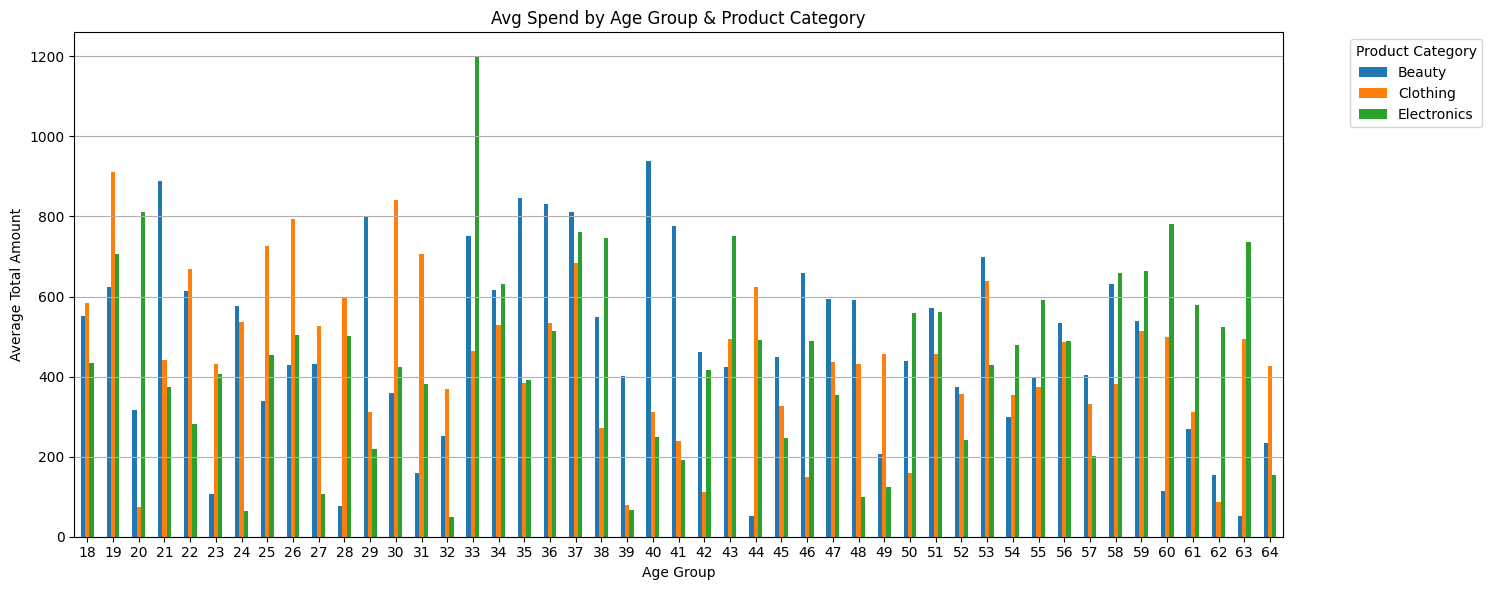

In [6]:
grouped = df.groupby(["Age", "Product Category"])["Total Amount"].mean().unstack()
print(grouped)
grouped.plot(kind='bar', figsize=(15, 6))
plt.title("Avg Spend by Age Group & Product Category")
plt.xlabel("Age Group")
plt.ylabel("Average Total Amount")
plt.xticks(rotation=0)
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()




from all this plot we can see high number of spender is between 30 to 40 ,and with time they become low spender cause someone else spend for them  so yes that's how it work.
and catogory trend work with time to time as we see for beauty se spend reguler base and for clothing they wait for new trend and electronics are one time investment one time but too high .





From the data we got:-
1. Females generally have higher spending power compared to males.


2. The age group between 32 to 40 tends to have higher spending power.


3. The market is significantly high from April to June, and it drops after December.

4. beauty got high spenders

5. The beauty category is evergreen and consistently .

6. clothing go with trend after specific time we see a upp.

7. The electronics category is viewed as an investment, with spending increasing over time.
